<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/EEG_Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This is the project of Big Data and Machine Learning. This paper is about Electroencephalogram (EEG)-based emotion recognition. The code is proposed to do these procedure in sequnce.


1.   Data Preparation. Doing this to know what the SEED-IV is like.
2.   SVM classification. This model is easy, at least we can get the passed mark.
3.   CNN classificaiton. This modle is hard, we can do it if time allows.
4.   K Means. We are curious what if we use non labeled network?
4.   Other morden networks. This is hard because we need to find the mordern and special networks. I do not think this is plausible.
## Abbreviations
PSD: Power Spectral Density.

PCA: Principal Component Analysis.

PSD: Power Spectral Density.

DE: Differential Entropy.

LDS: linear dynamical system.




# Data Preparation
This will show how the data is.







## File overview by heirachy
1.   **eeg_feature_smooth**. The smooth data of EGG.
Including three sessions, each session has 15 subjects, each subject has two groups consists of DE & PSD feature extract method, each group has two filter group consists of LDS & moving average filters, each filter group has 24 labled variables, each variable has information about 62 electrodes, several time windows, 5 frequency bands.
2.   **eeg_raw_data**. Raw EGG data which has 1000 Hz sampling rate using the ESI NeuroScan System.
3.   **eye_feature_smooth**. The smooth data of eye. The top features are same as eeg_feature_smooth, but the each variable consists of 12 features and several time windows.
4.   **eye_raw_data**. Raw eye data which captured by SMI ETG eye-tracking glasses.
5.   **Channel Order.xlsx**. The EGG electrod name and order in eeg_feature_smooth & eeg_raw_data.
6.   **channel_62_pos**. The 62 EGG channels on the head location. The specific data and head location map does not show.
7.   **ReadMe.txt**. Introduction of the dataset, including copyright, sample gender, label, reference and contact information.
8.   **SEED-IV_stimulation.xlsx**. The video stimulation of the people, which contains video clip of three experiments.
9.   **SEED-IV_subject_info.txt**. The subject gengder, including nine female and six male.

In the Machine learning, this paper will only use eeg_feature_smooth, eye_feature_smooth, ReadMe.txt, Channel Order.xlsx as my input data. Other data in SEED_IV are kinds of middle data that do be used in this paper.

The data is not huge and might currently the author is skeptical about the training result. Fistly, show the EGG and eye data into figures for initial analyze.

As the origin paper says, DE extraction and LDS filter has the best performance. So, this paper tackles with DE feature extraction with LDS filter first. Original paper says they use T7, T8, FT7, FT8, TP7,and TP8, which index in mat are 24, 32, 15, 23, 33, and 41.

In [2]:
# remove all variables
rm(list = ls())
# optional, free memory
gc()
# Install
if(!require(R.matlab)) install.packages("R.matlab")
if(!require(googledrive)) install.packages("googledrive")
if(!require(devtools)) install.packages("devtools")
if(!require(e1071)) install.packages("e1071")
if(!require(plotly)) install.packages("plotly")
if(!require(reshape2)) install.packages("reshape2")  # for reshaping table to long format
if(!require(ggplot2)) install.packages("ggplot2")   # only run once
if(!require(e1071)) install.packages("e1071")



# Library / Link
library(R.matlab)
library(googledrive)
library(devtools)
library(e1071)
library(reshape2)
library(ggplot2)
library(e1071)




# Initialization
# login to Googl Drive
drive_auth()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1342614,71.8,2371190,126.7,2371190,126.7
Vcells,2417611,18.5,8388608,64.0,8190691,62.5


Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=a556d125f30f26107fd5e7e9a5a6fbe4&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWIzMmo5MUpQUXpQNW9jYzlQS0xwVVZGM0hqVHlFWGh4WlhiME1qUFhidUZrZ2dmWDdQWEVQNUV2WWduNnhnLUVTbDhOUSIsInN0YXRlIjoiYTU1NmQxMjVmMzBmMjYxMDdmZDVlN2U5YTVhNmZiZTQifQ==


## Plot the file for better understanding


### Plot one person's data.

[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.



name          
1 1_20160518.mat
  path                                                              
1 ~/Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat
  id                                drive_resource                   
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1r64a1aynHlpqQyhkNh6w1dYVUVQOmpUv
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>             <NA>           <NA>   <NA>   <NA>  <NA>            
1 drive#permission anyoneWithLink anyone writer FALSE drive#permission
  <NA>                 <NA> <NA>                   <NA>  <NA>       
1 14809535534033574514 user nieyangfeigo@gmail.com owner yangfei nie
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA> 
1 FALSE FALSE drive FALSE FALSE FALSE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE
  <NA> <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> 
1 TRUE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE FALSE TRUE TRUE TRUE FALSE
  <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> <NA> <NA>           <NA>                
1 TRUE FALSE FALSE TRUE TRUE TRUE TRUE TRUE anyoneWithLink 14809535534033574514
  <NA>  <NA> <NA>  <NA>  <NA>  <NA>  <NA>      
1 FALSE TRUE FALSE FALSE FALSE FALSE drive#file
  <NA>                              <NA>           <NA>                    
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1_20160518.mat application/octet-stream
  <NA>  <NA>  <NA>  <NA>
1 FALSE FALSE FALSE 12  
  <NA>                                                                            
1 https://drive.google.com/uc?id=1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ&export=download
  <NA>                                                                               
1 https://drive.google.com/file/d/1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ/view?usp=drivesdk
  <NA>                                                                           
1 https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream
  <NA>  <NA> <NA> <NA>                     <NA>                    
1 FALSE 0    TRUE 2025-10-17T21:46:09.595Z 2025-10-17T21:46:09.595Z
  <NA>                     <NA>                     <NA> <NA> <NA> <NA> <NA> 
1 2018-11-15T15:04:54.000Z 2018-11-15T15:04:54.000Z TRUE TRUE TRUE TRUE FALSE
  <NA> <NA>           <NA> <NA> <NA>                            
1 TRUE 1_20160518.mat mat  mat  7861e59e376101c225e5d2cc72898d89
  <NA>                                    
1 e8d98a4cf5e108a7f5760a3faa903bba12446e8d
  <NA>                                                             <NA>   
1 0c65161c6b064276c855b1774e8a21d0e9ecf1162d1202a7c89dad9c30b19b70 7786107
  <NA>    <NA>                                                <NA>  <NA> 
1 7786107 0B1AUM7oqgWhbcW5XU0UyTEVUbnQ5aEpMR0ROYUorSEpvWmhJPQ FALSE FALSE

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• 1_20160518.mat



[1] "Before names"


[1] "de.movingAve1"   "de.LDS1"         "psd.movingAve1"  "psd.LDS1"       
 [5] "de.movingAve2"   "de.LDS2"         "psd.movingAve2"  "psd.LDS2"       
 [9] "de.movingAve3"   "de.LDS3"         "psd.movingAve3"  "psd.LDS3"       
[13] "de.movingAve4"   "de.LDS4"         "psd.movingAve4"  "psd.LDS4"       
[17] "de.movingAve5"   "de.LDS5"         "psd.movingAve5"  "psd.LDS5"       
[21] "de.movingAve6"   "de.LDS6"         "psd.movingAve6"  "psd.LDS6"       
[25] "de.movingAve7"   "de.LDS7"         "psd.movingAve7"  "psd.LDS7"       
[29] "de.movingAve8"   "de.LDS8"         "psd.movingAve8"  "psd.LDS8"       
[33] "de.movingAve9"   "de.LDS9"         "psd.movingAve9"  "psd.LDS9"       
[37] "de.movingAve10"  "de.LDS10"        "psd.movingAve10" "psd.LDS10"      
[41] "de.movingAve11"  "de.LDS11"        "psd.movingAve11" "psd.LDS11"      
[45] "de.movingAve12"  "de.LDS12"        "psd.movingAve12" "psd.LDS12"      
[49] "de.movingAve13"  "de.LDS13"        "psd.movingAve13" "psd.LDS13"      
[53] "de.movingAve14"  "de.LDS14"        "psd.movingAve14" "psd.LDS14"      
[57] "de.movingAve15"  "de.LDS15"        "psd.movingAve15" "psd.LDS15"      
[61] "de.movingAve16"  "de.LDS16"        "psd.movingAve16" "psd.LDS16"      
[65] "de.movingAve17"  "de.LDS17"        "psd.movingAve17" "psd.LDS17"      
[69] "de.movingAve18"  "de.LDS18"        "psd.movingAve18" "psd.LDS18"      
[73] "de.movingAve19"  "de.LDS19"        "psd.movingAve19" "psd.LDS19"      
[77] "de.movingAve20"  "de.LDS20"        "psd.movingAve20" "psd.LDS20"      
[81] "de.movingAve21"  "de.LDS21"        "psd.movingAve21" "psd.LDS21"      
[85] "de.movingAve22"  "de.LDS22"        "psd.movingAve22" "psd.LDS22"      
[89] "de.movingAve23"  "de.LDS23"        "psd.movingAve23" "psd.LDS23"      
[93] "de.movingAve24"  "de.LDS24"        "psd.movingAve24" "psd.LDS24"

[1] "After names"
          [,1]     [,2]     [,3]     [,4]     [,5]
 [1,] 25.80807 23.18175 22.40944 21.10645 18.91765
 [2,] 25.80882 23.18238 22.40955 21.10644 18.91731
 [3,] 25.80877 23.18234 22.41035 21.10671 18.91671
 [4,] 25.80916 23.18194 22.41150 21.10716 18.91632
 [5,] 25.80911 23.18055 22.41201 21.10801 18.91650
 [6,] 25.80886 23.17989 22.41204 21.10864 18.91666
 [7,] 25.80654 23.17933 22.41190 21.10955 18.91703
 [8,] 25.80432 23.17923 22.41226 21.11045 18.91703
 [9,] 25.80157 23.17917 22.41304 21.11217 18.91672
[10,] 25.79912 23.17885 22.41353 21.11325 18.91612
[11,] 25.79780 23.17900 22.41283 21.11338 18.91576
[12,] 25.79707 23.17857 22.41139 21.11351 18.91565
[13,] 25.79524 23.17765 22.40912 21.11288 18.91571
[14,] 25.79188 23.17641 22.40601 21.11206 18.91607
[15,] 25.78727 23.17494 22.40279 21.11140 18.91660
[16,] 25.78135 23.17280 22.39947 21.11071 18.91771
[17,] 25.77439 23.17109 22.39550 21.11048 18.91868
[18,] 25.76779 23.16972 22.39122 21.11043 18.91994
[19,] 25.7607

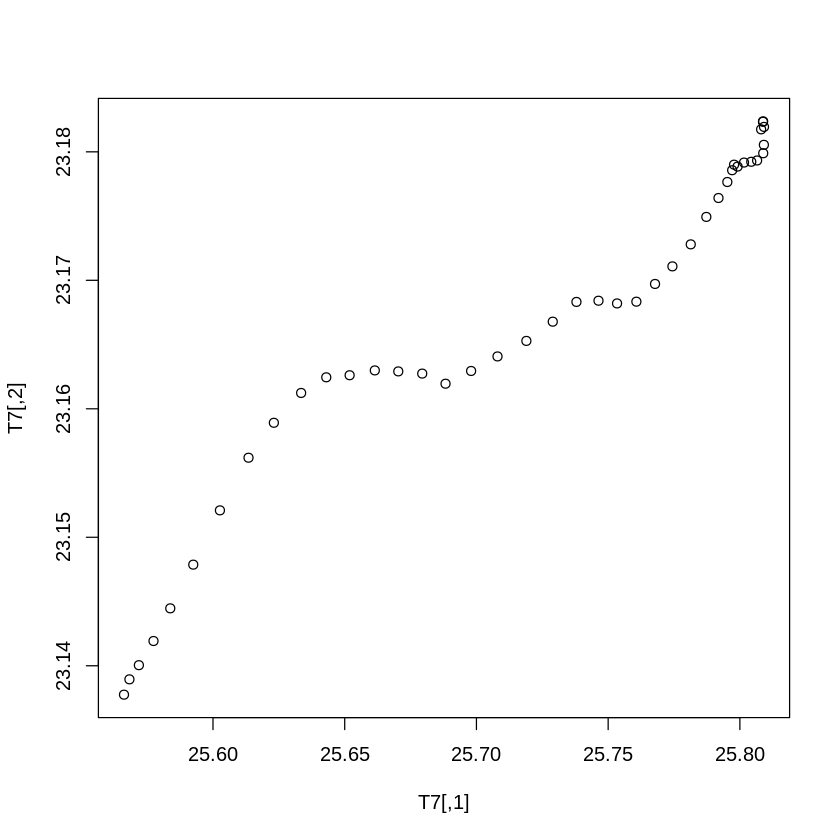

[1] "a"
 [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
 [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
[17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
[25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
[1] "subject1"
  [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
  [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
 [17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
 [25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
 [33] 25.80807 25.80882 25.80877 25.80916 25.80911 25.80886 25.80654 25.80432
 [41] 25.80157 25.79912 25.79780 25.79707 25.79524 25.79188 25.78727 25.78135
 [49] 25.77439 25.76779 25.76071 25.75338 25.74633 25.73796 25.72897 25.71895
 [57] 25.70800 25.69798 25.68827 25.67942 25.67033 25.66143 25.65187 25.64300
 [65] 25.63346 25.62311 25.61348 25.60263 25.

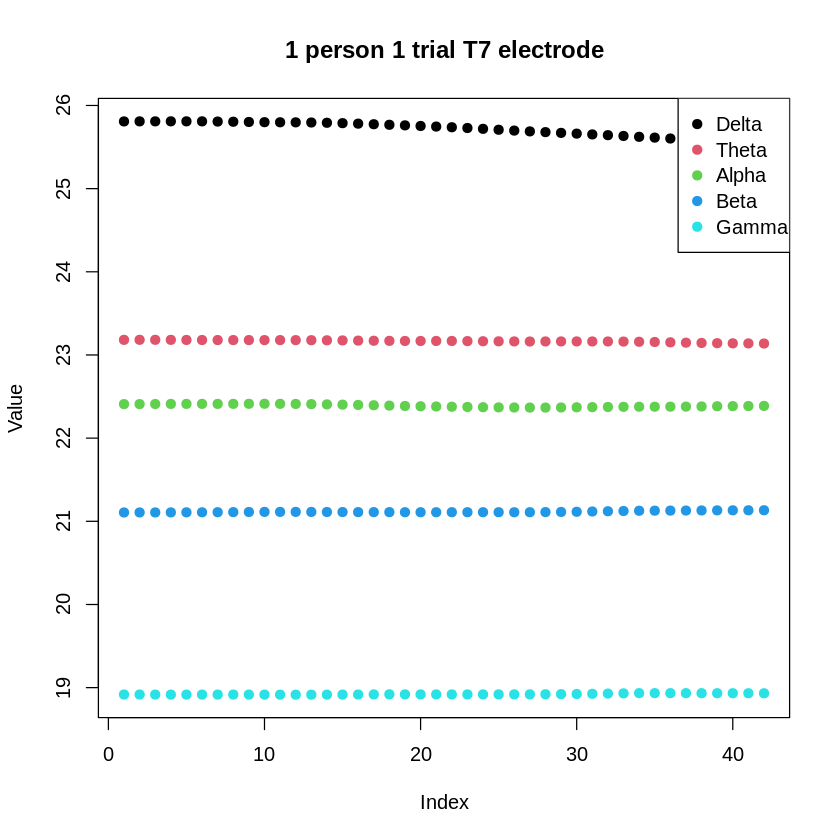

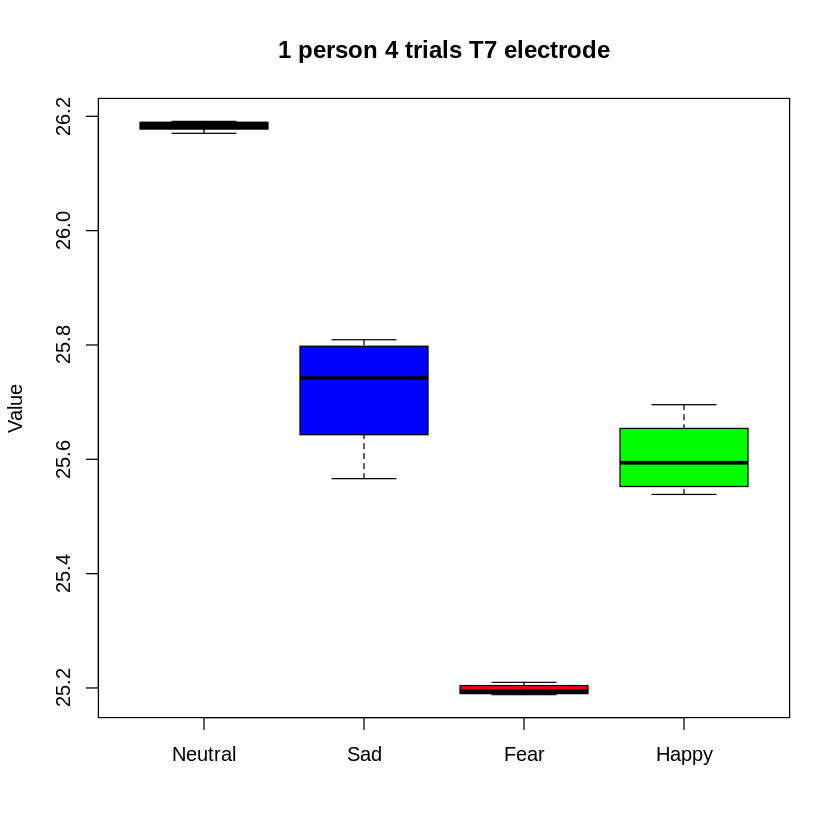

In [3]:
## I want to read and show EGG & eye data. To see how it is?


# Read mat file
EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
print(EGG_sample_file_path_name)
# Find the file in my Google Drive and see it
EGG_sample_file <- drive_get(EGG_sample_file_path_name)
head(EGG_sample_file)
drive_download(EGG_sample_file, path = "1_20160518.mat", overwrite = TRUE)
# Get one sample to see, which is session1-subject1 data.
sample <- readMat("1_20160518.mat")

print("Before names")
names(sample)
print("After names")

# Get 1st trial to see T7 electrode info.
de_LDS1 <- sample$de.LDS1
T7 <- de_LDS1[24, , ]
print(T7)
plot(T7)

# Mat plot is easier for the five band data.
matplot(T7, pch = 19, col = 1:5,
        main = "1 person 1 trial T7 electrode",
        xlab = "Index", ylab = "Value")
legend("topright", legend = c("Delta", "Theta", "Alpha", "Beta","Gamma"),
       col = 1:5, pch = 19)

# Let us see the LDS4 data.
a = sample$de.LDS4[24, , 1]
# a = as.vector(a)
print("a")
print(a)

# session1_label = [1,2,3,0 ...], let us see differenct emotions in T7 delta band.
subject1 = c(sample$de.LDS4[24, , 1], sample$de.LDS1[24, , 1], sample$de.LDS2[24, , 1], sample$de.LDS3[24, , 1])
print("subject1")
print(subject1)
neutral = sample$de.LDS4[24, , 1]
sad = sample$de.LDS1[24, , 1]
fear = sample$de.LDS2[24, , 1]
happy = sample$de.LDS3[24, , 1]

# Well, the emotions are distinguishable.
boxplot(neutral, sad, fear, happy,
        names = c("Neutral", "Sad", "Fear", "Happy"),
        main = "1 person 4 trials T7 electrode",
        ylab = "Value",
        col = c("black", "blue", "red", "green"))

# Now, we have a sensitive feeling of the one set of data.



## Get data from .mat files

In [4]:
############################################################
# Date: 2025-10-29
# Description:
#   Read the .mat files from Google drive.
#
############################################################


################################# Real scale declaration. Use when really run.
## Declaration
# Session number
session_number <- 3
# Subject number
subject_number <- 15
# Trial number
trial_number <- 24
# Session file name. Well, there should be a beautiful regulation expression to tackle with the file name. I choose the hard coding file name method.
# The files are not so much anyway.
session1_file <- c("1_20160518.mat","2_20150915.mat","3_20150919.mat","4_20151111.mat","5_20160406.mat","6_20150507.mat","7_20150715.mat","8_20151103.mat","9_20151028.mat","10_20151014.mat","11_20150916.mat","12_20150725.mat","13_20151115.mat","14_20151205.mat","15_20150508.mat")
session2_file <- c("1_20161125.mat","2_20150920.mat","3_20151018.mat","4_20151118.mat","5_20160413.mat","6_20150511.mat","7_20150717.mat","8_20151110.mat","9_20151119.mat","10_20151021.mat","11_20150921.mat","12_20150804.mat","13_20151125.mat","14_20151208.mat","15_20150514.mat")
session3_file <- c("1_20161126.mat","2_20151012.mat","3_20151101.mat","4_20151123.mat","5_20160420.mat","6_20150512.mat","7_20150721.mat","8_20151117.mat","9_20151209.mat","10_20151023.mat","11_20151011.mat","12_20150807.mat","13_20161130.mat","14_20151215.mat","15_20150527.mat")
session_file <- matrix(
  c(session1_file, session2_file, session3_file),
  nrow = session_number,
  ncol = subject_number,
  byrow = TRUE
)
# Session label
session1_label <- c(1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3)
session2_label <- c(2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1)
session3_label <- c(1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0)
session_label <- c(session1_label, session2_label, session3_label)
session_label <- matrix(
  c(session1_label, session2_label, session3_label),
  nrow = session_number,
  ncol = trial_number,
  byrow = TRUE
)

train_test_split = 16
################################# Real scale declaration



# ################################# Test scale data. use when coding new features.
# ## Declaration
# # Session number
# session_number <- 3
# # Subject number
# subject_number <- 2
# # Trial number
# trial_number <- 4
# # Session file name. Well, there should be a beautiful regulation expression to tackle with the file name. I choose the hard coding file name method.
# # The files are not so much anyway.
# session1_file <- c("1_20160518.mat","2_20150915.mat")
# session2_file <- c("1_20161125.mat","2_20150920.mat")
# session3_file <- c("1_20161126.mat","2_20151012.mat")
# session_file <- matrix(
#   c(session1_file, session2_file, session3_file),
#   nrow = session_number,
#   ncol = subject_number,
#   byrow = TRUE
# )
# # Session label
# session1_label <- c(1,2,3,0)
# session2_label <- c(2,1,3,0)
# session3_label <- c(1,2,2,1)
# session_label <- c(session1_label, session2_label, session3_label)
# session_label <- matrix(
#   c(session1_label, session2_label, session3_label),
#   nrow = session_number,
#   ncol = trial_number,
#   byrow = TRUE
# )
# session_label
# train_test_split = 2

# ################################# Test scale declaration



# Directory
root_path <- "Project_EGG_Big_Data/SEED_IV"
egg_path <- paste0(root_path, "/eeg_feature_smooth")
eye_path <- paste0(root_path, "/eye_feature_smooth")
# Six Electrode index
FT7_order <- 15L
FT8_order <- 23L
T7_order <- 24L
T8_order <- 32L
TP7_order <- 33L
TP8_order <- 41L
# Frequency index
delta_order <- 1
theta_order <- 2
alpha_order <- 3
beta_order <- 4
gamma_order <- 5
# time order, because DE split each trial to lots of 4 seconds. I should know how many 4 seconds.
times_order <-2

# Six electrode name.
FT7 <- matrix(0, nrow = 0, ncol = 5)
FT8 <- matrix(0, nrow = 0, ncol = 5)
T7 <- matrix(0, nrow = 0, ncol = 5)
T8 <- matrix(0, nrow = 0, ncol = 5)
TP7 <- matrix(0, nrow = 0, ncol = 5)
TP8 <- matrix(0, nrow = 0, ncol = 5)
# Eye movement parameters
pupile_diameter <- matrix(0, nrow = 12, ncol = 0)
dispersion <- matrix(0, nrow = 4, ncol = 0)
blink_duration <- matrix(0, nrow = 2, ncol = 0)
saccade <- matrix(0, nrow = 4, ncol = 0)
event_statistics <- matrix(0, nrow = 9, ncol = 0)
# Emotion.
emotion <- c()
# Index of data.
train_index <- c()
test_index <- c()
session3_index <- 0
# session, subject, trial, index
record_info <- matrix(0, nrow = 0, ncol = 4)



# Iterate all sessions to read file.
for(session_index in 1:session_number)
{
  # Print the paths.
  print(paste("Session number is", session_index))
  egg_session_path =  paste0(egg_path, "/", session_index)
  eye_session_path =  paste0(eye_path, "/", session_index)

  # Iterate all subjects to read file.
  for(subject_index in 1:subject_number){
    print(paste("Subject number is", subject_index))

    # Construct file path names.
    egg_file_path_name <- paste0(egg_session_path, "/", session_file[session_index, subject_index])
    print(egg_file_path_name)
    eye_file_path_name <- paste0(eye_session_path, "/", session_file[session_index, subject_index])
    print(eye_file_path_name)


    # Find the file in my Google Drive and see it
    egg_file_Google_drive <- drive_get(egg_file_path_name)
    eye_file_Google_drive <- drive_get(eye_file_path_name)
    print(paste0("egg file: ", egg_file_Google_drive))
    print(paste0("eye file: ", eye_file_path_name))

    # Use local name because there are some names that are same. So, to avoid overwrite each other.
    egg_file_name_local = paste0("egg_", egg_file_Google_drive$name)
    eye_file_name_local = paste0("eye_", eye_file_Google_drive$name)
    # Down load files.
    drive_download(egg_file_Google_drive, path = egg_file_name_local, overwrite = TRUE)
    drive_download(eye_file_Google_drive, path = paste0("eye_", eye_file_Google_drive$name), overwrite = TRUE)
    # Read files to variables.
    egg_file_local <- readMat(egg_file_name_local)
    eye_file_local <- readMat(eye_file_name_local)


    # Iterate all trials to read file.
    for(trial_index in 1:trial_number){

      print(paste("Session ", session_index, ", Subject ", subject_index, ", Trial ", trial_index))

      # The session_index
      if (session_index == 3 && subject_index == 1 && trial_index == 1) {
        session3_index <- length(emotion) + 1
      }


      # Get variables in .mat file.
      de_LDS <- egg_file_local[[paste0("de.LDS", trial_index)]]
      eye_data <- eye_file_local[[paste0("eye.", trial_index)]]

      print("Before eye data")
      str(eye_data)
      print("After eye data")

      # Get eeg six electrods info and combine them. These splits not mandatory because we can split later.
      # But spliting here makes me feel clearer.
      FT7 <- rbind(FT7, de_LDS[FT7_order, , ])
      FT8 <- rbind(FT8, de_LDS[FT8_order, , ])
      T7 <- rbind(T7, de_LDS[T7_order, , ])
      T8 <- rbind(T8, de_LDS[T8_order, , ])
      TP7 <- rbind(TP7, de_LDS[TP7_order, , ])
      TP8 <- rbind(TP8, de_LDS[TP8_order, , ])
      # Eye data.
      if (session_index == 1 && subject_index == 1 && trial_index == 1) {
        pupile_diameter <- t(eye_data[1:12, ])
      } else {
        pupile_diameter <- rbind(pupile_diameter, t(eye_data[1:12, ]))
      }
      if (session_index == 1 && subject_index == 1 && trial_index == 1) {
        dispersion <- t(eye_data[13:16, ])
      } else {
        dispersion <- rbind(dispersion, t(eye_data[13:16, ]))
      }
      if (session_index == 1 && subject_index == 1 && trial_index == 1) {
        blink_duration <- t(eye_data[17:18, ])
      } else {
        blink_duration <- rbind(blink_duration, t(eye_data[17:18, ]))
      }
      if (session_index == 1 && subject_index == 1 && trial_index == 1) {
        saccade <- t(eye_data[19:22, ])
      } else {
        saccade <- rbind(saccade, t(eye_data[19:22, ]))
      }
      if (session_index == 1 && subject_index == 1 && trial_index == 1) {
        event_statistics <- t(eye_data[23:31, ])
      } else {
        event_statistics <- rbind(event_statistics, t(eye_data[23:31, ]))
      }

      # How many 4 s time windows
      time_window_number = dim(de_LDS)[times_order]
      emotion <- c(emotion, rep(session_label[session_index, trial_index], time_window_number))

      # The data index added by this loop.
      added_index <- (length(emotion) - time_window_number + 1) : (length(emotion))
      if(trial_index <= train_test_split){
        train_index <- c(train_index, added_index)
      } else{
        test_index <- c(test_index, added_index)
      }

      session3_index
      # session, subject, trial, index
      vals <- c(session_index, subject_index, trial_index)
      mat <- matrix(rep(vals, time_window_number), nrow = time_window_number, byrow = TRUE)
      mat <- cbind(mat, added_index)
      if (session_index == 1 && subject_index == 1 && trial_index == 1) {
        record_info <- mat
      }else{
        record_info <- rbind(record_info, mat)
      }

    }
  }
}

str(FT7)
str(pupile_diameter)
str(dispersion)
str(blink_duration)
str(saccade)
str(event_statistics)


[1] "Session number is 1"
[1] "Subject number is 1"
[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
[1] "Project_EGG_Big_Data/SEED_IV/eye_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 1_20160518.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• egg_1_20160518.mat

File downloaded:

• 1_20160518.mat <id: 1eC1vQnsYNJ9i4sRvqx4vLJQR1tmd7e-Q>

Saved locally as:

• eye_1_20160518.mat



[1] "Session  1 , Subject  1 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 99.29 68.41 7.01 7.33 25.23 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 109.69 68.77 7.95 6.26 25.52 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 109.07 71.16 8.09 8.16 25.52 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 86 60.29 6.66 6.7 24.81 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 114.53 66.69 8.57 7.49 25.62 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 86.17 58.56 5.68 6.4 24.83 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 84.34 57.58 4.62 6.2 24.77 ...
[1] "After eye data"
[1] "Session  1 , Subject  1 , Trial  8"
[1] "Before eye data"
 n

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 2_20150915.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 2_20150915.mat <id: 1_bsVe_EleIcI_e1RnMkHkBUCxaojBQWB>

Saved locally as:

• egg_2_20150915.mat

File downloaded:

• 2_20150915.mat <id: 1znTayVuZPLgf_y0GJZE1JmSc7juAny33>

Saved locally as:

• eye_2_20150915.mat



[1] "Session  1 , Subject  2 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 90.76 82.88 5.25 6.65 24.96 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 101.37 88.66 6.1 6.66 25.31 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 105.47 89.55 5.76 4.59 25.4 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 78.24 72.54 5.01 6.2 24.54 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 124.69 108.81 5.62 6.02 25.9 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 74.33 69.25 4.95 5.92 24.39 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 74.72 68.74 4.41 5.72 24.41 ...
[1] "After eye data"
[1] "Session  1 , Subject  2 , Trial  8"
[1] "Before eye data"

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 3_20150919.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 3_20150919.mat <id: 1zNlMmsv5d5F_wxQG-tiX54karcDa_LHD>

Saved locally as:

• egg_3_20150919.mat

File downloaded:

• 3_20150919.mat <id: 1zZj8XZxjj83JatvoZk5ZBNpkgQRjAhIQ>

Saved locally as:

• eye_3_20150919.mat



[1] "Session  1 , Subject  3 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 85.01 55.94 4.34 4.51 24.78 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 93.39 64.72 5.25 5.12 25.06 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 100.22 68.49 4.45 5.83 25.27 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 75.47 51.21 4.37 4.41 24.44 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 105.49 63.99 5.6 5.12 25.41 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 68.2 44.03 3.87 3.94 24.16 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 64.99 43.69 3.27 3.41 24.02 ...
[1] "After eye data"
[1] "Session  1 , Subject  3 , Trial  8"
[1] "Before eye data"

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 4_20151111.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 4_20151111.mat <id: 1ADg5EXorBGdZ3qkOvvy4yEO6J4x_JQRv>

Saved locally as:

• egg_4_20151111.mat

File downloaded:

• 4_20151111.mat <id: 1vqwbMhgJ1K0HFto5ACZJ2V2LM5_vKBwR>

Saved locally as:

• eye_4_20151111.mat



[1] "Session  1 , Subject  4 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 123.8 89.94 5.93 8.29 25.86 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 131.19 98.75 7.11 8.72 26.03 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 137.62 96.05 6.68 7.7 26.18 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 89.05 68.94 7.18 8.39 24.91 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 146.22 102.08 7.37 7.57 26.34 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 87.96 67.6 6.52 8.4 24.86 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 87.36 66.18 5.33 7.51 24.87 ...
[1] "After eye data"
[1] "Session  1 , Subject  4 , Trial  8"
[1] "Before eye data

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 5_20160406.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 5_20160406.mat <id: 1UJdGFDmVVNBJ3QarLVGYKDxCI1Zk-JeF>

Saved locally as:

• egg_5_20160406.mat

File downloaded:

• 5_20160406.mat <id: 1pbrgisIguvVGH7s1XB1ymn5SNE0tnaaD>

Saved locally as:

• eye_5_20160406.mat



[1] "Session  1 , Subject  5 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 74.2 56.4 4.04 5.95 24.39 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 85.3 64.09 5.75 5.85 24.79 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 81.38 60.1 5.69 6.23 24.65 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 55.87 45.35 3.56 4.49 23.57 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 89.69 70.38 4.58 4.49 24.96 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 55.16 43.06 3.92 4.03 23.51 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 55.65 45.03 3.09 4.28 23.57 ...
[1] "After eye data"
[1] "Session  1 , Subject  5 , Trial  8"
[1] "Before eye data"
 nu

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 6_20150507.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 6_20150507.mat <id: 1xdAJgpM424sEISElNeJ5lN9ZzMUDkmgp>

Saved locally as:

• egg_6_20150507.mat

File downloaded:

• 6_20150507.mat <id: 1Wdh7_tOmaBJOTddzDUhDNmyPpD2WUbkl>

Saved locally as:

• eye_6_20150507.mat



[1] "Session  1 , Subject  6 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 107.39 75.38 4.96 6.89 25.47 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 114.47 79.66 4.17 4.56 25.65 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 100.04 69.2 6.38 6.55 25.17 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 88.69 65.59 5.38 4.58 24.91 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 103.84 74.95 3.5 4.19 25.37 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 78.02 58.51 3.96 3.57 24.53 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 77.74 59.61 3.84 4 24.51 ...
[1] "After eye data"
[1] "Session  1 , Subject  6 , Trial  8"
[1] "Before eye data"


✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 7_20150715.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 7_20150715.mat <id: 1apO9sMDAo2c02vc9_EBx-TuP0nDEf378>

Saved locally as:

• egg_7_20150715.mat

File downloaded:

• 7_20150715.mat <id: 1C7XltRYDIVKk1Nc4dZz6GOOph1oqjJ_->

Saved locally as:

• eye_7_20150715.mat



[1] "Session  1 , Subject  7 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 85.44 69.3 3.73 4.86 24.79 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 95.3 74.15 4.34 4.96 25.11 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 90.04 65.75 3.62 5.26 24.95 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 67.85 53.03 6.23 6.8 24.14 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 99.54 71.57 3.28 4.73 25.25 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 63.63 50.82 3.95 4.86 23.96 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 62.84 51.6 3.44 4.7 23.91 ...
[1] "After eye data"
[1] "Session  1 , Subject  7 , Trial  8"
[1] "Before eye data"
 num

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 8_20151103.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 8_20151103.mat <id: 1W52L0czwW9wHUwECNANMnG5q79bj1C0S>

Saved locally as:

• egg_8_20151103.mat

File downloaded:

• 8_20151103.mat <id: 1CzoiXhIs_C7xFmxL5Uo8jqIwMrPCXn5E>

Saved locally as:

• eye_8_20151103.mat



[1] "Session  1 , Subject  8 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 109.53 88.03 4.94 5.26 25.51 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 115.9 92.61 6.13 6.81 25.71 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 118 99.85 5.32 5.22 25.74 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 89.39 71.01 6.08 5.68 24.94 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 132.16 110.38 5.2 7.85 26.08 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 85.06 67.05 5.47 4.69 24.78 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 86.55 67.29 5 4.54 24.84 ...
[1] "After eye data"
[1] "Session  1 , Subject  8 , Trial  8"
[1] "Before eye data"
 n

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 9_20151028.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 9_20151028.mat <id: 1aGZYuWxTqv68d5x1fxTAJh_yKpQPnbwV>

Saved locally as:

• egg_9_20151028.mat

File downloaded:

• 9_20151028.mat <id: 1Ai2gptHfTlZUyyE-0Zom6qszqSZlm6YS>

Saved locally as:

• eye_9_20151028.mat



[1] "Session  1 , Subject  9 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 128.74 95.71 4.89 9.89 25.98 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 134.89 86.74 9.41 9.03 26.14 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 142.53 100.27 5.93 8.97 26.28 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 105.63 82.69 6.85 9.4 25.42 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 141.24 93.54 7.7 8.81 26.23 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 97.75 73.58 6.67 8.29 25.16 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 97.15 74.25 5.65 7.67 25.18 ...
[1] "After eye data"
[1] "Session  1 , Subject  9 , Trial  8"
[1] "Before eye d

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 10_20151014.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 10_20151014.mat <id: 1O2v_ViBV2cY4-AgqZRnYeO4XT2DqLB9a>

Saved locally as:

• egg_10_20151014.mat

File downloaded:

• 10_20151014.mat <id: 1jO7vZkAtsSNip6QOjr34Jv_t_RoQgRc6>

Saved locally as:

• eye_10_20151014.mat



[1] "Session  1 , Subject  10 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 73.83 59.32 3.41 5.33 24.38 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 87.62 70.53 3.89 5.07 24.89 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 96.84 79.47 3.39 5.14 25.16 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 64.91 57.2 4.39 6.12 24.01 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 102.65 84.26 3.28 4.68 25.33 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 61.5 52.73 3.86 4.58 23.86 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 64.82 55.36 3.37 5 24 ...
[1] "After eye data"
[1] "Session  1 , Subject  10 , Trial  8"
[1] "Before eye data

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 11_20150916.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 11_20150916.mat <id: 1lN_uz4LOslmCpBBWIvmopSnd1NRaIuZQ>

Saved locally as:

• egg_11_20150916.mat

File downloaded:

• 11_20150916.mat <id: 147rFr_b0Fz8td4ZCxpUZ-5X1LueH_3Lt>

Saved locally as:

• eye_11_20150916.mat



[1] "Session  1 , Subject  11 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 111.6 78.72 7.87 7.83 25.54 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 122.75 77.96 5.33 5.47 25.86 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 117.53 77.55 5.72 6.29 25.72 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 86.69 64.75 4.77 6.27 24.85 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 121.17 79.41 5.07 4.7 25.81 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 80.56 61.21 4.17 5.6 24.63 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 82.48 63.15 3.62 5.79 24.72 ...
[1] "After eye data"
[1] "Session  1 , Subject  11 , Trial  8"
[1] "Before 

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 12_20150725.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 12_20150725.mat <id: 1ENVENRiJp6wBAElgznKW0EYCwNmGc3ey>

Saved locally as:

• egg_12_20150725.mat

File downloaded:

• 12_20150725.mat <id: 1YFeXid67S8Ti1vdu0POO9K1lNxbr8KHd>

Saved locally as:

• eye_12_20150725.mat



[1] "Session  1 , Subject  12 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 86.61 63.83 6.47 7.9 24.86 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 87.69 69.04 9.61 9.98 24.86 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 91.96 67.39 6.63 8.3 24.99 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 75.22 61.42 6.91 8.76 24.44 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 97.18 75.34 7.17 7.87 25.18 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 69.52 54.76 6.14 6.59 24.22 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 67.75 53.86 5.14 6.1 24.11 ...
[1] "After eye data"
[1] "Session  1 , Subject  12 , Trial  8"
[1] "Before eye 

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 13_20151115.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 13_20151115.mat <id: 1lmSWNGaH-dttQEja1eO7_yJTuGPoZLOv>

Saved locally as:

• egg_13_20151115.mat

File downloaded:

• 13_20151115.mat <id: 1skU6Moi0mQ4iQFWmoSjXhJ1rn3vNWo4h>

Saved locally as:

• eye_13_20151115.mat



[1] "Session  1 , Subject  13 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 103.44 77.54 4.11 7.66 25.35 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 112.08 80.22 4.11 5.42 25.6 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 113.77 75 5.87 6.94 25.61 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 83.54 64.79 4.57 7.68 24.73 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 127.8 89.92 3.13 6.18 25.98 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 81.36 63.92 4.67 6.89 24.64 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 79.76 62.05 4.09 6.36 24.6 ...
[1] "After eye data"
[1] "Session  1 , Subject  13 , Trial  8"
[1] "Before eye

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 14_20151205.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 14_20151205.mat <id: 1dbu4wADTF8UjoodBODXT-iCyKK07vTBo>

Saved locally as:

• egg_14_20151205.mat

File downloaded:

• 14_20151205.mat <id: 1ayUM5lyg2ZWD0ADXEsga3BF-ETKCe0pi>

Saved locally as:

• eye_14_20151205.mat



[1] "Session  1 , Subject  14 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 86.18 61.82 5.04 5.36 24.8 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 105.43 76.51 6.47 6.49 25.39 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 105.97 76.74 5.67 5.52 25.43 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 70.81 51.22 5.22 4.5 24.27 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 129.87 83.63 4.81 6.33 26.01 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 71.4 44.99 5.31 5.02 24.27 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 70.19 46.43 4.32 4.15 24.24 ...
[1] "After eye data"
[1] "Session  1 , Subject  14 , Trial  8"
[1] "Before e

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 15_20150508.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 15_20150508.mat <id: 1T4drQEj52Wr3b5koreSgBbHIL9mu1Ybx>

Saved locally as:

• egg_15_20150508.mat

File downloaded:

• 15_20150508.mat <id: 1WAGCnyx2i9UFgighHFU1ycK1j8H0HHky>

Saved locally as:

• eye_15_20150508.mat



[1] "Session  1 , Subject  15 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 94.2 64.3 18 12 25.1 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:23] 111 78 20.4 14.5 25.6 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:49] 84.9 53.5 18.7 11.3 24.7 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:32] 102.67 73.99 10.62 8.36 25.3 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:22] 122.9 98.7 11.4 10.6 25.9 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:40] 92.76 70.87 9.76 8.47 25.05 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:38] 91.19 68.27 8.89 7.91 24.99 ...
[1] "After eye data"
[1] "Session  1 , Subject  15 , Trial  8"
[1] "Before eye data"
 num [1:

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 1_20161125.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 1_20161125.mat <id: 1EtA57GBv9_eaQfv0DIorY9uZokjuVzMs>

Saved locally as:

• egg_1_20161125.mat

File downloaded:

• 1_20161125.mat <id: 1Mvbjc_Y5uAxWxnoTfl-WGKdZEcOD3Vmc>

Saved locally as:

• eye_1_20161125.mat



[1] "Session  2 , Subject  1 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 116.77 101.26 5.21 6.05 25.7 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 113.67 98.01 7.2 8.28 25.64 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 95.91 81.99 5.38 6.34 25.15 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 84.63 76.52 6.38 7.65 24.79 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 85.89 77.64 5.29 7.8 24.83 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 106.47 89.84 4.6 4.86 25.44 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 82.77 72.26 5.8 6.02 24.72 ...
[1] "After eye data"
[1] "Session  2 , Subject  1 , Trial  8"
[1] "Before eye data"


✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 2_20150920.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 2_20150920.mat <id: 1hIOIzrNEzNssI1r-qAIous9rAqbihjFq>

Saved locally as:

• egg_2_20150920.mat

File downloaded:

• 2_20150920.mat <id: 1IOFJXU3fAgmcMYD9fiQ-UXDcSfgF0n54>

Saved locally as:

• eye_2_20150920.mat



[1] "Session  2 , Subject  2 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 111.4 98.09 5.59 6.24 25.56 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 90.58 74.55 5.17 5.59 24.96 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 85.96 66.73 5.01 4.43 24.83 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 74.19 66.37 4.71 5.24 24.39 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 74.06 65.46 4.71 5.36 24.38 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 102.78 88.56 4.47 5.98 25.33 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 72.85 63.76 5.35 5.39 24.32 ...
[1] "After eye data"
[1] "Session  2 , Subject  2 , Trial  8"
[1] "Before eye data

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 3_20151018.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 3_20151018.mat <id: 181HQQafgxyxOwsK9VTFWu8f1utlFCcYi>

Saved locally as:

• egg_3_20151018.mat

File downloaded:

• 3_20151018.mat <id: 1A_IXAmL2shiKMUXpKgfTvhs2V0UEbpOA>

Saved locally as:

• eye_3_20151018.mat



[1] "Session  2 , Subject  3 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 97.1 78.19 5.01 5.11 25.17 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 82.84 62.44 4.47 4.8 24.72 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 78.03 62.56 4.94 5.01 24.53 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 73.03 58.17 5.36 5.36 24.35 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 72.91 57.07 4.7 4.98 24.35 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 88.06 65.82 4.4 4.44 24.87 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 68.38 55.19 4.1 4.72 24.16 ...
[1] "After eye data"
[1] "Session  2 , Subject  3 , Trial  8"
[1] "Before eye data"
 num

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 4_20151118.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 4_20151118.mat <id: 17Dxje553qgsbm9o087M9j2vWdHlUzLnj>

Saved locally as:

• egg_4_20151118.mat

File downloaded:

• 4_20151118.mat <id: 1lHf1KRL7mg6_j5DnfFFiCyzypoR5r7ti>

Saved locally as:

• eye_4_20151118.mat



[1] "Session  2 , Subject  4 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 142.07 103.39 10.15 8.89 26.26 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 110.46 80.43 6.92 5.76 25.54 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 104.49 82.85 6.28 6.96 25.39 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 97.47 79.97 8.89 8.64 25.16 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 96.36 75.36 6.95 7.99 25.13 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 133.14 88.9 8.66 8.33 26.09 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 92.12 70.37 7.47 6.89 25 ...
[1] "After eye data"
[1] "Session  2 , Subject  4 , Trial  8"
[1] "Before eye dat

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 5_20160413.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 5_20160413.mat <id: 1ZvifXJOfsKO6Afyw8dOGq8jKYcn3ejij>

Saved locally as:

• egg_5_20160413.mat

File downloaded:

• 5_20160413.mat <id: 1658b_Ey6h-1IB2-sGxjFK68LWjT6Jr79>

Saved locally as:

• eye_5_20160413.mat



[1] "Session  2 , Subject  5 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 90.94 78.99 5.23 5.36 24.98 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 79.27 63.61 5.09 4.78 24.57 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 72.81 60.01 4.5 4.51 24.35 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 67.05 59.5 4.45 5.26 24.11 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 64.22 55.83 3.56 4.66 23.98 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 84.77 67.56 4.86 5.04 24.79 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 61.22 44.56 4.06 4.41 23.85 ...
[1] "After eye data"
[1] "Session  2 , Subject  5 , Trial  8"
[1] "Before eye data"
 

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 6_20150511.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 6_20150511.mat <id: 1BiZkE5XIB0WjsCMfljuwjDDsrM1SVhdb>

Saved locally as:

• egg_6_20150511.mat

File downloaded:

• 6_20150511.mat <id: 1i0dsDmAVhSWzAe2ngDMvpPizslar6dT8>

Saved locally as:

• eye_6_20150511.mat



[1] "Session  2 , Subject  6 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 145.58 114.64 5.37 5.64 26.34 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 120.36 94.76 4.83 4.11 25.8 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 99.56 75.55 5.49 5.72 25.24 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 88.13 67.91 5.64 5.4 24.88 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 93.36 71.53 5.29 4.94 25.04 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 123.41 95.87 5.53 4.48 25.86 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 102.25 81.51 6.99 6.58 25.25 ...
[1] "After eye data"
[1] "Session  2 , Subject  6 , Trial  8"
[1] "Before eye da

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 7_20150717.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 7_20150717.mat <id: 1VzVXGotQ0JY3YHUL3F4lqLUsu6rhwfOi>

Saved locally as:

• egg_7_20150717.mat

File downloaded:

• 7_20150717.mat <id: 15ZHpG_ZLgM8wdJxWNNYwxIhQUkB2Zrml>

Saved locally as:

• eye_7_20150717.mat



[1] "Session  2 , Subject  7 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 91.11 70.2 5.07 4.59 24.99 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 74.8 55.76 3.73 3.98 24.41 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 64.95 49.73 4.24 4.98 24.02 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 60.36 49.1 4.97 5.02 23.79 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 61.09 47.37 4.14 4.79 23.82 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 82.68 64.44 4.38 3.78 24.72 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 54.71 45.21 3.43 3.88 23.5 ...
[1] "After eye data"
[1] "Session  2 , Subject  7 , Trial  8"
[1] "Before eye data"
 nu

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 8_20151110.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 8_20151110.mat <id: 1fYoontd2h4yh7jekrnpMvGiDO2jLCHGd>

Saved locally as:

• egg_8_20151110.mat

File downloaded:

• 8_20151110.mat <id: 1COS4oJzEIehNKZixh_l5ud1eAnD1E0-T>

Saved locally as:

• eye_8_20151110.mat



[1] "Session  2 , Subject  8 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 120.51 104.13 8.03 8.06 25.78 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 101.93 86.4 5.3 5.65 25.32 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 93.38 83.77 7.13 8.26 25.03 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 87.75 80.12 6.93 7.13 24.89 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 92.12 83.29 5.43 5.64 25.01 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 119.99 107.06 5 6.01 25.79 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 89.26 81.17 6.68 6.41 24.94 ...
[1] "After eye data"
[1] "Session  2 , Subject  8 , Trial  8"
[1] "Before eye data"

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 9_20151119.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 9_20151119.mat <id: 1HGDoIEh_SNtNv18aUnbnQnUksyOfaW5j>

Saved locally as:

• egg_9_20151119.mat

File downloaded:

• 9_20151119.mat <id: 1Z5_sHTUk8YThqcej10_22Wr4mlMfZ_1S>

Saved locally as:

• eye_9_20151119.mat



[1] "Session  2 , Subject  9 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 90.5 59 15.6 11.4 24.8 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 108.56 74 5.16 6.07 25.5 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 89.83 61.95 6.82 5.51 24.94 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 77.68 56.45 7.51 6.32 24.53 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 80.29 60.66 6.77 6.42 24.62 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 105.58 62.26 8.94 5.88 25.41 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 78.71 57.65 6.63 6.21 24.56 ...
[1] "After eye data"
[1] "Session  2 , Subject  9 , Trial  8"
[1] "Before eye data"
 num [

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 10_20151021.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 10_20151021.mat <id: 1bXGZXFnb99sA2BdG4QYVp77ErmhBGmZ0>

Saved locally as:

• egg_10_20151021.mat

File downloaded:

• 10_20151021.mat <id: 1PIa1pOjI64qhvLI57Q2UvJmqtkSehT2J>

Saved locally as:

• eye_10_20151021.mat



[1] "Session  2 , Subject  10 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 111.27 81.33 4.26 6.12 25.56 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 95.33 64.03 4.26 4.24 25.11 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 85.66 62.33 4.6 5.47 24.81 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 73.76 54.65 5.59 6.49 24.38 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 76.93 57.42 4.64 5.97 24.51 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 99.96 72.33 4.9 5.36 25.25 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 72.49 55.32 5.47 5.89 24.32 ...
[1] "After eye data"
[1] "Session  2 , Subject  10 , Trial  8"
[1] "Before ey

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 11_20150921.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 11_20150921.mat <id: 143RjM4JYxtyI7REOM_tnQsPOhPU1gboG>

Saved locally as:

• egg_11_20150921.mat

File downloaded:

• 11_20150921.mat <id: 1cBUT57767w7_ACtFIw9_2-MokDVkpDRS>

Saved locally as:

• eye_11_20150921.mat



[1] "Session  2 , Subject  11 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 132.16 97.28 7.34 7.42 26.07 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 112.07 82.75 5.23 5.57 25.58 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 104.52 80.45 5.94 6.35 25.4 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 99.91 80.97 6.12 6.77 25.25 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 100.18 81.78 4.77 6.72 25.27 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 120.72 90.63 5.81 5.66 25.79 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 96.89 77.08 5.89 5.55 25.16 ...
[1] "After eye data"
[1] "Session  2 , Subject  11 , Trial  8"
[1] "Befo

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 12_20150804.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 12_20150804.mat <id: 1i6MAfaDSXcH4cVaGD7uNqHZXkSpW5Q1m>

Saved locally as:

• egg_12_20150804.mat

File downloaded:

• 12_20150804.mat <id: 1Kbio6mrQ0-6k6vtu2WuGhKw7s5oILnbW>

Saved locally as:

• eye_12_20150804.mat



[1] "Session  2 , Subject  12 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 84.23 67.52 6.35 5.55 24.75 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 68.01 50.91 5.11 4.9 24.16 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 63.91 48.99 4.84 4.67 23.97 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 62.63 52.16 5.39 6.15 23.9 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 60.6 49.64 5.41 6.5 23.81 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 76.23 60.39 5.65 5.45 24.43 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 59.94 47.83 4.43 5.35 23.76 ...
[1] "After eye data"
[1] "Session  2 , Subject  12 , Trial  8"
[1] "Before eye d

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 13_20151125.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 13_20151125.mat <id: 1iA27ocnCQdcnHKJ4V4hODbtFzlEn8APu>

Saved locally as:

• egg_13_20151125.mat

File downloaded:

• 13_20151125.mat <id: 1JG_wH2MlTCglnD2N0GwpzjA8kEdLAuzK>

Saved locally as:

• eye_13_20151125.mat



[1] "Session  2 , Subject  13 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 131.78 94.89 4.43 4.86 26.05 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 105.04 77.61 4.58 5.11 25.42 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 90.41 63.46 6.86 6.26 24.98 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 80.71 59.84 5.84 6.6 24.62 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 82.45 65.62 4.56 6.76 24.7 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 115.38 81.74 4.91 5.16 25.67 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 78.67 58.51 4.73 5.16 24.58 ...
[1] "After eye data"
[1] "Session  2 , Subject  13 , Trial  8"
[1] "Before 

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 14_20151208.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 14_20151208.mat <id: 1zp97KRpx0Ba10q04rWsvPdrYZfRxPKkX>

Saved locally as:

• egg_14_20151208.mat

File downloaded:

• 14_20151208.mat <id: 1CDArQ2710YVKXKC9VAutdLZlNeTTCiLR>

Saved locally as:

• eye_14_20151208.mat



[1] "Session  2 , Subject  14 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 105.43 69.47 12.14 8.01 25.09 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 79.85 55.54 5.24 4.82 24.61 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 71.33 51.39 4.88 4.98 24.28 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 66.11 46.56 5.77 5.33 24.06 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 69.3 47 8.12 6.93 24.19 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 70.97 39.79 12.86 6.87 23.78 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 64.73 44.68 4.44 4.32 23.99 ...
[1] "After eye data"
[1] "Session  2 , Subject  14 , Trial  8"
[1] "Before ey

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 15_20150514.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 15_20150514.mat <id: 1vMAgmFl5KzuVOAtujQFryQJ8rP7dMleS>

Saved locally as:

• egg_15_20150514.mat

File downloaded:

• 15_20150514.mat <id: 1SuFNyYsHkYAHAQ-Lk_sbxzrVr6Q6mTzb>

Saved locally as:

• eye_15_20150514.mat



[1] "Session  2 , Subject  15 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:55] 129.4 91.9 12.6 10.8 26 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:25] 98.8 65.5 17 12.4 25.2 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:34] 95.9 59.2 16.9 11.9 25.2 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:36] 96.39 69.12 10.67 8.99 25.13 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:53] 100.55 72.67 9.93 8.95 25.26 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:27] 124.4 91.2 13.7 11.7 25.9 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:34] 97.3 71.6 11.7 10.7 25.2 ...
[1] "After eye data"
[1] "Session  2 , Subject  15 , Trial  8"
[1] "Before eye data"
 num [

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 1_20161126.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 1_20161126.mat <id: 1HYeuOav8sEorWu0kZ7A0Tx8Nk97YzqsC>

Saved locally as:

• egg_1_20161126.mat

File downloaded:

• 1_20161126.mat <id: 1UBAKuqglJWDsUu5_cCimp5En8DLGlFak>

Saved locally as:

• eye_1_20161126.mat



[1] "Session  3 , Subject  1 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 93.79 83.01 5.87 6.8 25.05 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 126.36 104.53 5.12 5.16 25.93 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 122.25 104.24 7.51 7.38 25.83 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 111.71 94.65 6.49 6.36 25.56 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 94 77.15 4.58 4.72 25.09 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 85.94 69.18 5.43 5.54 24.83 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 95.34 75.64 3.3 3.97 25.12 ...
[1] "After eye data"
[1] "Session  3 , Subject  1 , Trial  8"
[1] "Before eye data"

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 2_20151012.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 2_20151012.mat <id: 1zS2A7GQOI_yqdKlspsINUQW63pYy9kpr>

Saved locally as:

• egg_2_20151012.mat

File downloaded:

• 2_20151012.mat <id: 1uRhWljik_ijtaprKtGUIDTHw1LULVlVe>

Saved locally as:

• eye_2_20151012.mat



[1] "Session  3 , Subject  2 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 81.49 68.65 4.86 5.86 24.66 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 116.43 97.61 4.98 6.45 25.68 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 122.51 103.89 5.9 6.28 25.82 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 100.38 83.27 5.67 5.58 25.27 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 78.45 69.45 4.16 4.84 24.57 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 73.27 55.57 4.47 3.91 24.37 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 79.25 65.96 2.14 2.62 24.59 ...
[1] "After eye data"
[1] "Session  3 , Subject  2 , Trial  8"
[1] "Before eye da

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 3_20151101.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 3_20151101.mat <id: 1NecWd3ByGo8JrrgFnQdDnJYHevl2_IRy>

Saved locally as:

• egg_3_20151101.mat

File downloaded:

• 3_20151101.mat <id: 1YLHWHGNxlb_2sYC6FGvy3Rzo32ZE8iga>

Saved locally as:

• eye_3_20151101.mat



[1] "Session  3 , Subject  3 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 65.33 45.83 4.42 3.87 24.02 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 86.94 59.35 9.98 8.34 24.87 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 92.38 63.45 8.42 7.72 25.02 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 78.76 54.67 4.72 4.09 24.58 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 65.25 45.94 3.34 4.31 24.02 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 57.37 37.63 3.11 2.99 23.65 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 68.31 47.37 2.26 2.4 24.16 ...
[1] "After eye data"
[1] "Session  3 , Subject  3 , Trial  8"
[1] "Before eye data"


✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 4_20151123.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 4_20151123.mat <id: 1LGUrFcYitRUUHpKLl7v4-wLOnqm3HE7B>

Saved locally as:

• egg_4_20151123.mat

File downloaded:

• 4_20151123.mat <id: 1JTYcwa9s4ZZ73BlyU5p2en5KRpVvtyQX>

Saved locally as:

• eye_4_20151123.mat



[1] "Session  3 , Subject  4 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 89.42 78.56 7.49 7.25 24.92 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 138.23 112.41 8.56 7.76 26.17 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 140.79 118.78 9.64 7.78 26.27 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 119.8 102 8.17 7.12 25.77 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 91.67 77.01 6.36 6.2 25.01 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 82 70.33 6.04 6.24 24.7 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 102.21 89.11 4.67 4.89 25.3 ...
[1] "After eye data"
[1] "Session  3 , Subject  4 , Trial  8"
[1] "Before eye data"
 n

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 5_20160420.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 5_20160420.mat <id: 1pdn4netXrtrA1vFNpswZTYeh3Te4vfSV>

Saved locally as:

• egg_5_20160420.mat

File downloaded:

• 5_20160420.mat <id: 1d9Lw_ND9RoVEpcXDKjR7NB7MoPqz9ES_>

Saved locally as:

• eye_5_20160420.mat



[1] "Session  3 , Subject  5 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 59.7 43.52 3.35 3.85 23.75 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 79.86 59.5 3.98 4.18 24.6 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 77.02 60.39 4.34 4.62 24.53 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 71.82 50.61 4.42 4.09 24.31 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 57.5 40.6 3.7 3.5 23.7 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 54.91 39.99 3.35 4.24 23.55 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 64 48.27 2.06 2.67 23.97 ...
[1] "After eye data"
[1] "Session  3 , Subject  5 , Trial  8"
[1] "Before eye data"
 num [1:31

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 6_20150512.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 6_20150512.mat <id: 1xmGI77x7ZI0OwTBkn-KZQ6JSm9cs-u4r>

Saved locally as:

• egg_6_20150512.mat

File downloaded:

• 6_20150512.mat <id: 1RykFF4kg6uSRhT9PeqKWZjM-oVxWtBUl>

Saved locally as:

• eye_6_20150512.mat



[1] "Session  3 , Subject  6 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 94.69 75.68 4.64 5.28 25.1 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 117.96 99.96 4.04 5.01 25.74 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 117.51 99.84 4.28 4.65 25.73 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 102.96 85.45 4.87 5.19 25.34 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 80.65 62.32 3.54 3.55 24.64 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 72.98 60.57 4.33 5.17 24.35 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 81.89 65.21 2.11 2.2 24.69 ...
[1] "After eye data"
[1] "Session  3 , Subject  6 , Trial  8"
[1] "Before eye data

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 7_20150721.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 7_20150721.mat <id: 1zAWByENngAj3UpOuTsZ35gsU0uUgnfvx>

Saved locally as:

• egg_7_20150721.mat

File downloaded:

• 7_20150721.mat <id: 16gkAjd8WsPh3ByOzOJYj9X-zDeW3klG0>

Saved locally as:

• eye_7_20150721.mat



[1] "Session  3 , Subject  7 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 68.25 54.75 4.33 4.44 24.16 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 90.53 67.19 3.96 4.55 24.97 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 87.64 67.68 4.5 4.91 24.89 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 80.18 60.71 4.86 4.58 24.6 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 57.63 46.62 3.31 4.15 23.65 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 59.19 42.06 5.47 4.86 23.74 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 64.94 49.65 2.13 2.4 24.01 ...
[1] "After eye data"
[1] "Session  3 , Subject  7 , Trial  8"
[1] "Before eye data"
 n

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 8_20151117.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 8_20151117.mat <id: 1Rf6bRd2_JFapXl-xqnIbgS_9mhgcwVqx>

Saved locally as:

• egg_8_20151117.mat

File downloaded:

• 8_20151117.mat <id: 1Rg-NOAZKoWEwPL1L7pnYQbvZSdoCaeSC>

Saved locally as:

• eye_8_20151117.mat



[1] "Session  3 , Subject  8 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 96.73 76.11 5.71 5.69 25.14 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 123.22 97.33 4.56 6.4 25.86 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 118.08 97.91 6.71 6.65 25.74 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 108.1 90.03 6.66 6.38 25.48 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 90.93 74.7 5.19 5.15 25.01 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 88.71 72.16 6.03 5.33 24.93 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 97.5 83.36 2.95 3.03 25.18 ...
[1] "After eye data"
[1] "Session  3 , Subject  8 , Trial  8"
[1] "Before eye data"


✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 9_20151209.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

File downloaded:

• 9_20151209.mat <id: 1OpqeBZY8KSRYzEfR4QVCeXBNnx91gbco>

Saved locally as:

• egg_9_20151209.mat

File downloaded:

• 9_20151209.mat <id: 1QIWTAxCLVevxHCBAULQmq96Ru4sA1ZDY>

Saved locally as:

• eye_9_20151209.mat



[1] "Session  3 , Subject  9 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 109.36 85.66 6.4 7.33 25.51 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 132.81 80.13 8.91 6.66 26.02 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 103.3 57.6 21.1 11.2 25 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 121.38 82.45 7.97 6.77 25.79 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 89.91 61.18 7.08 4.98 24.94 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 82.68 58.56 6.68 5.68 24.71 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 99.37 66.69 3.44 2.87 25.25 ...
[1] "After eye data"
[1] "Session  3 , Subject  9 , Trial  8"
[1] "Before eye data"
 

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 10_20151023.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 10_20151023.mat <id: 14CNr0-MRP2ht0yasUIKSi-Uhdjxme5Sw>

Saved locally as:

• egg_10_20151023.mat

File downloaded:

• 10_20151023.mat <id: 1z3FrKbLYazPnPfE0gKk5Rdc_30KoR1TN>

Saved locally as:

• eye_10_20151023.mat



[1] "Session  3 , Subject  10 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 82.15 60.6 5.85 5.69 24.68 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 115.31 84.34 4.9 6.46 25.67 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 114.37 86.81 4.91 5.81 25.65 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 104.43 78.31 6.79 6.43 25.37 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 85.12 61.28 4.96 4.94 24.79 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 80.35 60.66 6.02 7.02 24.64 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 87.11 63.37 3.72 3.48 24.84 ...
[1] "After eye data"
[1] "Session  3 , Subject  10 , Trial  8"
[1] "Before 

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 11_20151011.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 11_20151011.mat <id: 1wr6eZsIEwlhGDhgRPLiR-rvXc38BnrAe>

Saved locally as:

• egg_11_20151011.mat

File downloaded:

• 11_20151011.mat <id: 1_MGPrFdayDmy645dLijbovYAHMtid4_N>

Saved locally as:

• eye_11_20151011.mat



[1] "Session  3 , Subject  11 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 100.41 60.63 5.48 4.98 25.27 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 129.71 71.18 6.93 5.76 26.01 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 122.89 77.9 8.94 7.4 25.81 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 106.8 65.5 14.3 10.4 25.4 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 91.03 53.43 5.73 4.33 24.95 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 88 53.5 4.42 4.65 24.89 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 104.62 63.55 2.3 2.68 25.39 ...
[1] "After eye data"
[1] "Session  3 , Subject  11 , Trial  8"
[1] "Before eye da

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 12_20150807.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 12_20150807.mat <id: 10Ca_57VnYuFVPOU5e9L6-9bF09vtk6Kw>

Saved locally as:

• egg_12_20150807.mat

File downloaded:

• 12_20150807.mat <id: 15Nfp6P0ve4RficMPu14j5ZfU67rOXrKq>

Saved locally as:

• eye_12_20150807.mat



[1] "Session  3 , Subject  12 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 72.52 58.27 5.31 6.02 24.31 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 99.13 70.27 4.44 5.03 25.23 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 90.48 67.26 5.88 5.91 24.98 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 81.91 61.67 5.66 5.94 24.66 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 64.24 52.3 5.56 5.92 24 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 60.31 48.94 4.14 5.37 23.8 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 66.45 54.77 2.2 3.23 24.08 ...
[1] "After eye data"
[1] "Session  3 , Subject  12 , Trial  8"
[1] "Before eye dat

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 13_20161130.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 13_20161130.mat <id: 1mOPYEDsohPgdryIkZRiPxjB-dXZ6ZBa6>

Saved locally as:

• egg_13_20161130.mat

File downloaded:

• 13_20161130.mat <id: 1PChuv29MftHsDRz4V4b6IStaL4VcFabj>

Saved locally as:

• eye_13_20161130.mat



[1] "Session  3 , Subject  13 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 77.28 60.98 4.96 5.9 24.51 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 85.69 68.24 5.89 6.76 24.77 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 108.59 90.32 4.32 4.93 25.51 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 93.56 77.12 4.76 5.57 25.07 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 72.42 55.76 4.04 4.81 24.33 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 67.87 53.83 4.98 7.22 24.15 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 80.61 64.74 3.53 4.04 24.64 ...
[1] "After eye data"
[1] "Session  3 , Subject  13 , Trial  8"
[1] "Before e

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 14_20151215.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 14_20151215.mat <id: 1z1ecML3yM0qZOuyoBt2rhMie-ZRGOcIe>

Saved locally as:

• egg_14_20151215.mat

File downloaded:

• 14_20151215.mat <id: 1LpGVVCUkHZpabCrHia0BA1FNglsRnbcF>

Saved locally as:

• eye_14_20151215.mat



[1] "Session  3 , Subject  14 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 77.29 56.43 5.08 4.96 24.51 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 133.78 101.74 7.44 16.17 26.09 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 118.91 73.2 6.39 7.52 25.75 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 91.47 69.68 7.31 6.29 24.97 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 74.05 53.74 4.23 4.17 24.39 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 67.47 50.33 4.38 4.97 24.13 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 76.61 58.07 2.57 2.74 24.49 ...
[1] "After eye data"
[1] "Session  3 , Subject  14 , Trial  8"
[1] "Befor

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



[1] "egg file: 15_20150527.mat"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

File downloaded:

• 15_20150527.mat <id: 12HmXUktHav5lkvtb-MptPSh6uEJ-xnM9>

Saved locally as:

• egg_15_20150527.mat

File downloaded:

• 15_20150527.mat <id: 1h4V0l95RaboThdW5oo7aF-GoBB-Atr1R>

Saved locally as:

• eye_15_20150527.mat



[1] "Session  3 , Subject  15 , Trial  1"
[1] "Before eye data"
 num [1:31, 1:42] 98.5 72.2 16.2 10.7 25.2 ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  2"
[1] "Before eye data"
 num [1:31, 1:32] 135.78 102.58 6.34 5.88 26.15 ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  3"
[1] "Before eye data"
 num [1:31, 1:23] 127.24 102.78 8.49 7.31 25.95 ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  4"
[1] "Before eye data"
 num [1:31, 1:45] 93.5 55.6 21.3 12 25 ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  5"
[1] "Before eye data"
 num [1:31, 1:48] 49.58 26.5 16.37 8.87 22.31 ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  6"
[1] "Before eye data"
 num [1:31, 1:26] 21.53 10.61 16.62 7.98 NaN ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  7"
[1] "Before eye data"
 num [1:31, 1:64] 58.68 33.73 6.01 3.38 23.17 ...
[1] "After eye data"
[1] "Session  3 , Subject  15 , Trial  8"
[1] "Before eye data

## Combine data to R data frame

In [5]:
############################################################
# Date: 2025-10-29
# Description:
#   Combine the data to R data frame for better training
#
############################################################

# Five bands of eeg electrods.
delta_order <- 1
theta_order <- 2
alpha_order <- 3
beta_order <- 4
gamma_order <- 5
# Orders of eyes.
p_x_mean_order = 1
# Emotion is the output.
emotion <- factor(emotion)
egg_data <- data.frame(
  FT7_delta = c(FT7[, delta_order]), FT7_theta = c(FT7[, theta_order]), FT7_alpha = c(FT7[, alpha_order]), FT7_beta = c(FT7[, beta_order]), FT7_gamma = c(FT7[, gamma_order]),
  FT8_delta = c(FT8[, delta_order]), FT8_theta = c(FT8[, theta_order]), FT8_alpha = c(FT8[, alpha_order]), FT8_beta = c(FT8[, beta_order]), FT8_gamma = c(FT8[, gamma_order]),
  T7_delta = c(T7[, delta_order]),   T7_theta = c(T7[, theta_order]),   T7_alpha = c(T7[, alpha_order]),   T7_beta = c(T7[, beta_order]),   T7_gamma = c(T7[, gamma_order]),
  T8_delta = c(T8[, delta_order]),   T8_theta = c(T8[, theta_order]),   T8_alpha = c(T8[, alpha_order]),   T8_beta = c(T8[, beta_order]),   T8_gamma = c(T8[, gamma_order]),
  TP7_delta = c(TP7[, delta_order]), TP7_theta = c(TP7[, theta_order]), TP7_alpha = c(TP7[, alpha_order]), TP7_beta = c(TP7[, beta_order]), TP7_gamma = c(TP7[, gamma_order]),
  TP8_delta = c(TP8[, delta_order]), TP8_theta = c(TP8[, theta_order]), TP8_alpha = c(TP8[, alpha_order]), TP8_beta = c(TP8[, beta_order]), TP8_gamma = c(TP8[, gamma_order]),

  # Well, every item of the eyes data is not clear because the sequence is not clear. I will name them in my knowledge anyway.
  # Better name than nothing.
  p_x_mean = c(pupile_diameter[,1]),
  p_y_mean = c(pupile_diameter[,2]),
  p_x_deviation = (pupile_diameter[,3]),
  p_y_deviation = c(pupile_diameter[,4]),
  p_x_band1 = c(pupile_diameter[,5]),
  p_x_band2 = c(pupile_diameter[,6]),
  p_x_band3 = c(pupile_diameter[,7]),
  p_x_band4 = c(pupile_diameter[,8]),
  p_y_band1 = c(pupile_diameter[,9]),
  p_y_band2 = c(pupile_diameter[,10]),
  p_y_band3 = c(pupile_diameter[,11]),
  p_y_band4 = c(pupile_diameter[,12]),

  d_x_mean = c(dispersion[,1]),
  d_x_deviation = c(dispersion[,2]),
  d_y_mean = c(dispersion[,3]),
  d_y_deviation = c(dispersion[,3]),


  b_mean = c(blink_duration[,1]),
  b_deviation = c(blink_duration[,2]),

  s_mean = c(saccade[,1]),
  s_deviation = c(saccade[,2]),
  s_amplitude = c(saccade[,3]),
  s_latency = c(saccade[,4]),

  e_blink_frequency = c(event_statistics[,1]),
  e_fixation_frequency = c(event_statistics[,2]),
  e_maximum_fixation_duration = c(event_statistics[,3]),
  e_total_fixation_dipersion = c(event_statistics[,4]),
  e_maximum_fixation_dipersion = c(event_statistics[,5]),
  e_saccade_frequency = c(event_statistics[,6]),
  e_average_saccade_duration = c(event_statistics[,7]),
  e_average_saccade_amplitude = c(event_statistics[,8]),
  e_average_saccade_latency = c(event_statistics[,9]),

  emotion
)










# Model training
Pay attention, only choose one type of split method.

In [6]:
# # Split by time windows.
# set.seed(123)

# # Split by sessions.
# # Row numbers that have any NA
# na_rows <- which(!complete.cases(egg_data))
# # View them and then will inspect
# na_rows
# # Why has NA data should be checked. There might be big wrong.
# # Split data to train and test sets.
# n <- nrow(egg_data)
# train_size <- floor(2/3 * n)
# train_index_time_windows <- sample(1:n, train_size)
# train_data <- egg_data[train_index_time_windows, ]
# test_data  <- egg_data[-train_index_time_windows, ]
# # Remove empty lines
# train_data <- na.omit(train_data)
# test_data <- na.omit(test_data)

# # Head data.
# print("train_data")
# str(train_data)
# head(train_data)
# print("test_data")
# head(test_data)
# str(test_data)

In [7]:
# # Split by trials.

# # Row numbers that have any NA
# na_rows <- which(!complete.cases(egg_data))
# # View them and then will inspect
# na_rows
# # Why has NA data should be checked. There might be big wrong.
# # Split data to train and test sets.
# train_data <- egg_data[train_index, ]
# test_data  <- egg_data[test_index, ]
# # Remove empty lines
# train_data <- na.omit(train_data)
# test_data <- na.omit(test_data)

# # Head data.
# print("train_data")
# str(train_data)
# head(train_data)
# print("test_data")
# head(test_data)
# str(test_data)

In [8]:
# Split by sessions.
# Row numbers that have any NA
na_rows <- which(!complete.cases(egg_data))
# View them and then will inspect
na_rows
# Why has NA data should be checked. There might be big wrong.
# Split data to train and test sets.
train_data <- egg_data[1:(session3_index - 1), ]
test_data  <- egg_data[session3_index:nrow(egg_data), ]
# Remove empty lines
train_data <- na.omit(train_data)
test_data <- na.omit(test_data)

# Head data.
print("train_data")
str(train_data)
head(train_data)
print("test_data")
head(test_data)
str(test_data)

[1] 36944 36945 36946 36947 36948 36949 36950 36951 36952 36953 36954 36955
[13] 36956 36957 36958 36959 36960 36961 36962 36963 36964 36965 36966 36967
[25] 36968 36969

[1] "train_data"
'data.frame':	25245 obs. of  62 variables:
 $ FT7_delta                   : num  25.8 25.8 25.8 25.8 25.8 ...
 $ FT7_theta                   : num  23.2 23.2 23.2 23.2 23.2 ...
 $ FT7_alpha                   : num  22.4 22.4 22.4 22.4 22.4 ...
 $ FT7_beta                    : num  21.1 21.1 21.1 21.1 21.1 ...
 $ FT7_gamma                   : num  18.9 18.9 18.9 18.9 18.9 ...
 $ FT8_delta                   : num  26.2 26.2 26.2 26.2 26.2 ...
 $ FT8_theta                   : num  23.5 23.5 23.5 23.5 23.5 ...
 $ FT8_alpha                   : num  22.4 22.4 22.4 22.4 22.4 ...
 $ FT8_beta                    : num  21 21 21 21 21 ...
 $ FT8_gamma                   : num  19 19 19 19 19 ...
 $ T7_delta                    : num  25.8 25.8 25.8 25.8 25.8 ...
 $ T7_theta                    : num  23.2 23.2 23.2 23.2 23.2 ...
 $ T7_alpha                    : num  22.4 22.4 22.4 22.4 22.4 ...
 $ T7_beta                     : num  21.1 21.1 21.1 21.1 21.1 ...
 $ T7_gamma           

,FT7_delta,FT7_theta,FT7_alpha,FT7_beta,FT7_gamma,FT8_delta,FT8_theta,FT8_alpha,FT8_beta,FT8_gamma,⋯,e_blink_frequency,e_fixation_frequency,e_maximum_fixation_duration,e_total_fixation_dipersion,e_maximum_fixation_dipersion,e_saccade_frequency,e_average_saccade_duration,e_average_saccade_amplitude,e_average_saccade_latency,emotion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,25.83411,23.20206,22.41607,21.10823,18.93196,26.23362,23.53272,22.40448,21.00848,18.98542,⋯,0.5,2.5,2894.5,12129.7,326.1,2.5,83.6,7.1,315.1,1
2,25.83486,23.20270,22.41619,21.10822,18.93161,26.23374,23.53339,22.40500,21.00848,18.98539,⋯,0.5,2.5,2894.5,12129.7,326.1,2.5,83.6,7.1,315.1,1
3,25.83480,23.20272,22.41701,21.10845,18.93098,26.23335,23.53404,22.40551,21.00872,18.98540,⋯,0.5,2.5,2894.5,12129.7,326.1,2.5,83.6,7.1,315.1,1
4,25.83521,23.20237,22.41817,21.10887,18.93053,26.23288,23.53422,22.40723,21.00864,18.98529,⋯,0.5,2.5,2894.5,12129.7,326.1,2.5,83.6,7.1,315.1,1
5,25.83517,23.20100,22.41869,21.10969,18.93063,26.23227,23.53388,22.40877,21.00855,18.98541,⋯,0.5,2.5,2894.5,12129.7,326.1,2.5,83.6,7.1,315.1,1
6,25.83495,23.20041,22.41871,21.11030,18.93069,26.23102,23.53458,22.41010,21.00852,18.98526,⋯,0.5,2.5,2894.5,12129.7,326.1,2.5,83.6,7.1,315.1,1


[1] "test_data"


,FT7_delta,FT7_theta,FT7_alpha,FT7_beta,FT7_gamma,FT8_delta,FT8_theta,FT8_alpha,FT8_beta,FT8_gamma,⋯,e_blink_frequency,e_fixation_frequency,e_maximum_fixation_duration,e_total_fixation_dipersion,e_maximum_fixation_dipersion,e_saccade_frequency,e_average_saccade_duration,e_average_saccade_amplitude,e_average_saccade_latency,emotion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
25246,25.65675,23.39685,22.30630,20.97997,19.38167,25.82800,23.45297,22.31106,21.00202,19.22518,⋯,0.3,2.4,5392.7,8512.6,174.3,2.1,80.1,4.6,386.8,1
25247,25.65598,23.39730,22.30546,20.97959,19.38102,25.82741,23.45359,22.31066,21.00148,19.22487,⋯,0.3,2.4,5392.7,8512.6,174.3,2.1,80.1,4.6,386.8,1
25248,25.65541,23.39811,22.30411,20.97886,19.37971,25.82697,23.45442,22.30995,21.00094,19.22467,⋯,0.3,2.4,5392.7,8512.6,174.3,2.1,80.1,4.6,386.8,1
25249,25.65593,23.39856,22.30312,20.97848,19.37829,25.82680,23.45481,22.30921,21.00060,19.22449,⋯,0.3,2.4,5392.7,8512.6,174.3,2.1,80.1,4.6,386.8,1
25250,25.65667,23.39896,22.30136,20.97761,19.37683,25.82569,23.45580,22.30840,21.00020,19.22449,⋯,0.3,2.4,5392.7,8512.6,174.3,2.1,80.1,4.6,386.8,1
25251,25.65753,23.39948,22.30020,20.97636,19.37515,25.82453,23.45678,22.30838,20.99989,19.22475,⋯,0.3,2.4,5392.7,8512.6,174.3,2.1,80.1,4.6,386.8,1


'data.frame':	12304 obs. of  62 variables:
 $ FT7_delta                   : num  25.7 25.7 25.7 25.7 25.7 ...
 $ FT7_theta                   : num  23.4 23.4 23.4 23.4 23.4 ...
 $ FT7_alpha                   : num  22.3 22.3 22.3 22.3 22.3 ...
 $ FT7_beta                    : num  21 21 21 21 21 ...
 $ FT7_gamma                   : num  19.4 19.4 19.4 19.4 19.4 ...
 $ FT8_delta                   : num  25.8 25.8 25.8 25.8 25.8 ...
 $ FT8_theta                   : num  23.5 23.5 23.5 23.5 23.5 ...
 $ FT8_alpha                   : num  22.3 22.3 22.3 22.3 22.3 ...
 $ FT8_beta                    : num  21 21 21 21 21 ...
 $ FT8_gamma                   : num  19.2 19.2 19.2 19.2 19.2 ...
 $ T7_delta                    : num  24.9 24.9 24.9 24.9 24.9 ...
 $ T7_theta                    : num  23.3 23.3 23.3 23.3 23.3 ...
 $ T7_alpha                    : num  22.4 22.4 22.3 22.3 22.3 ...
 $ T7_beta                     : num  20.9 20.9 20.9 20.9 20.9 ...
 $ T7_gamma                    : num  1

In [9]:
print(session3_index)

[1] 25246


## SVM

In [10]:
# Train SVM
# svm_model <- svm(emotion ~ ., data = train_data, kernel = "radial")
svm_model <- svm(
  formula = emotion ~ .,          # target variable: emotion, predictors: all other columns
  data = train_data,              # training dataset
  type = "C-classification",      # default type for classification
  kernel = "radial",              # default kernel you used
  gamma = 0.0005,  # default for radial
  cost = 10,                       # penalty parameter C of the error term
  cachesize = 40,                 # in MB
  tolerance = 0.001,              # epsilon for stopping criteria
  shrinking = TRUE,               # use shrinking heuristics
  cross = 0,                      # no cross-validation by default
  fitted = TRUE                   # return fitted values
)


# Prediction
pred <- predict(svm_model, newdata = test_data)
# Confusion matrix
table(Predicted = pred, Actual = test_data$emotion)

# Simple accuracy
mean(pred == test_data$emotion)

# str(svm_model)





# Train Prediction
pred <- predict(svm_model, newdata = train_data)
# Confusion matrix
table(Predicted = pred, Actual = train_data$emotion)

# Simple accuracy
mean(pred == train_data$emotion)

         Actual
Predicted    0    1    2    3
        0 2273  571  255  479
        1  845 1808  574  667
        2   63  498 1422  694
        3  254  543  194 1164

[1] 0.5418563

         Actual
Predicted    0    1    2    3
        0 6250  355   74  459
        1  279 5639  389  669
        2    0  422 6141  161
        3  206  409  176 3616

[1] 0.8574371

In [11]:
# Train SVM
# svm_model <- svm(emotion ~ ., data = train_data, kernel = "radial")
svm_model <- svm(
  formula = emotion ~ .,          # target variable: emotion, predictors: all other columns
  data = train_data,              # training dataset
  type = "C-classification",      # default type for classification
  kernel = "radial",              # default kernel you used
  gamma = 0.0005,  # default for radial
  cost = 0.1,                       # penalty parameter C of the error term
  cachesize = 40,                 # in MB
  tolerance = 0.001,              # epsilon for stopping criteria
  shrinking = TRUE,               # use shrinking heuristics
  cross = 0,                      # no cross-validation by default
  fitted = TRUE                   # return fitted values
)


# Prediction
pred <- predict(svm_model, newdata = test_data)
# Confusion matrix
table(Predicted = pred, Actual = test_data$emotion)

# Simple accuracy
mean(pred == test_data$emotion)

# str(svm_model)





# Train Prediction
pred <- predict(svm_model, newdata = train_data)
# Confusion matrix
table(Predicted = pred, Actual = train_data$emotion)

# Simple accuracy
mean(pred == train_data$emotion)

         Actual
Predicted    0    1    2    3
        0 2498  729  212  885
        1  742 1995  831  895
        2   73  468 1361  630
        3  122  228   41  594

[1] 0.5240572

         Actual
Predicted    0    1    2    3
        0 4808 1281  156 1290
        1 1417 4077 1197 1328
        2  210 1209 5225  560
        3  300  258  202 1727

[1] 0.6273321

In [12]:
# Train SVM
# svm_model <- svm(emotion ~ ., data = train_data, kernel = "radial")
svm_model <- svm(
  formula = emotion ~ .,          # target variable: emotion, predictors: all other columns
  data = train_data,              # training dataset
  type = "C-classification",      # default type for classification
  kernel = "radial",              # default kernel you used
  gamma = 0.0005,  # default for radial
  cost = 1,                       # penalty parameter C of the error term
  cachesize = 40,                 # in MB
  tolerance = 0.001,              # epsilon for stopping criteria
  shrinking = TRUE,               # use shrinking heuristics
  cross = 0,                      # no cross-validation by default
  fitted = TRUE                   # return fitted values
)


# Prediction
pred <- predict(svm_model, newdata = test_data)
# Confusion matrix
table(Predicted = pred, Actual = test_data$emotion)

# Simple accuracy
mean(pred == test_data$emotion)

# str(svm_model)





# Train Prediction
pred_train <- predict(svm_model, newdata = train_data)
# Confusion matrix
table(Predicted = pred_train, Actual = train_data$emotion)

# Simple accuracy
mean(pred_train == train_data$emotion)

         Actual
Predicted    0    1    2    3
        0 2508  603  229  327
        1  734 1918  725  735
        2   29  448 1365  718
        3  164  451  126 1224

[1] 0.5701398

         Actual
Predicted    0    1    2    3
        0 5927 1121   59  793
        1  324 4587  788  811
        2   70  748 5699  513
        3  414  369  234 2788

[1] 0.7526639

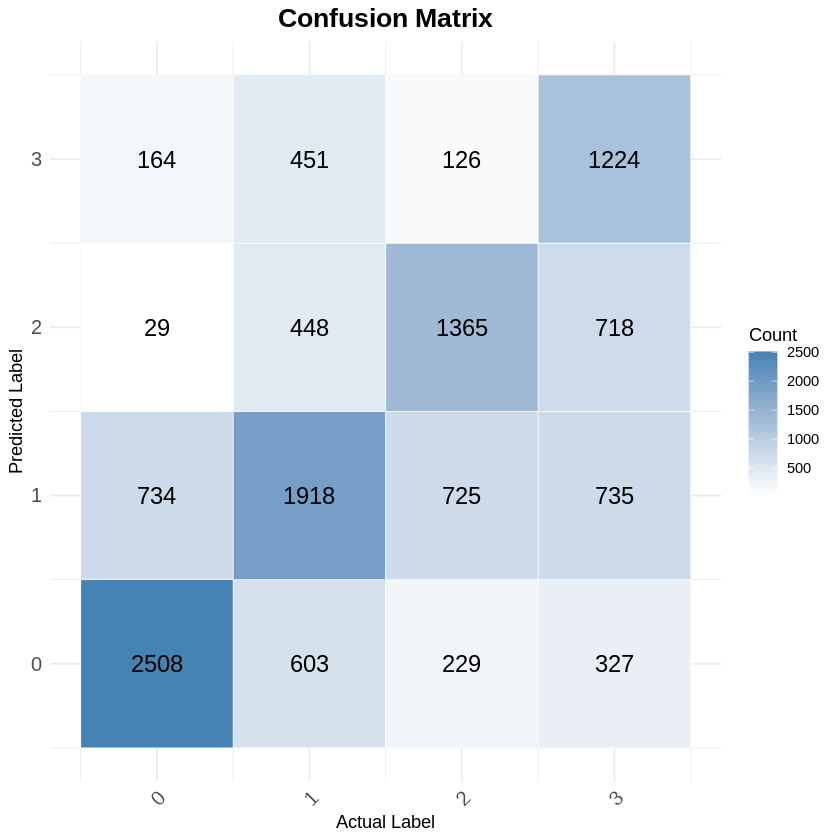

In [13]:
# Assuming `pred` is your predicted labels
conf_mat <- table(Predicted = pred, Actual = test_data$emotion)
conf_mat_long <- melt(conf_mat)
colnames(conf_mat_long) <- c("Predicted", "Actual", "Count")

# Heat map
ggplot(conf_mat_long, aes(x = Actual, y = Predicted, fill = Count)) +
  geom_tile(color = "white") +           # white borders
  geom_text(aes(label = Count), color = "black", size = 5) +  # add numbers
  scale_fill_gradient(low = "white", high = "steelblue") +    # colors
  theme_minimal() +
  labs(title = "Confusion Matrix", x = "Actual Label", y = "Predicted Label") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5))

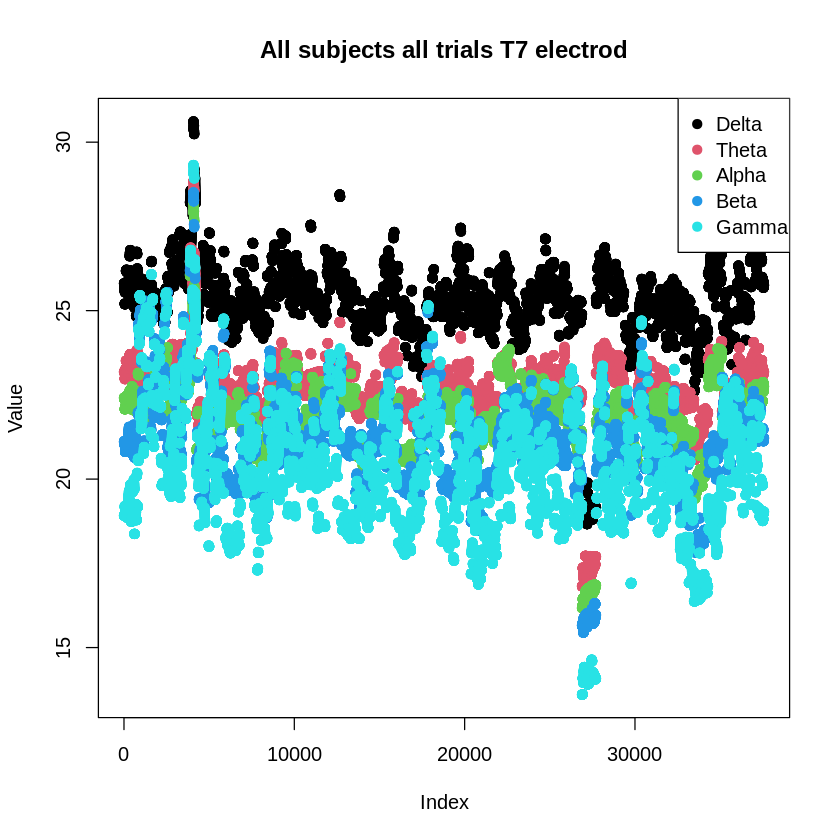

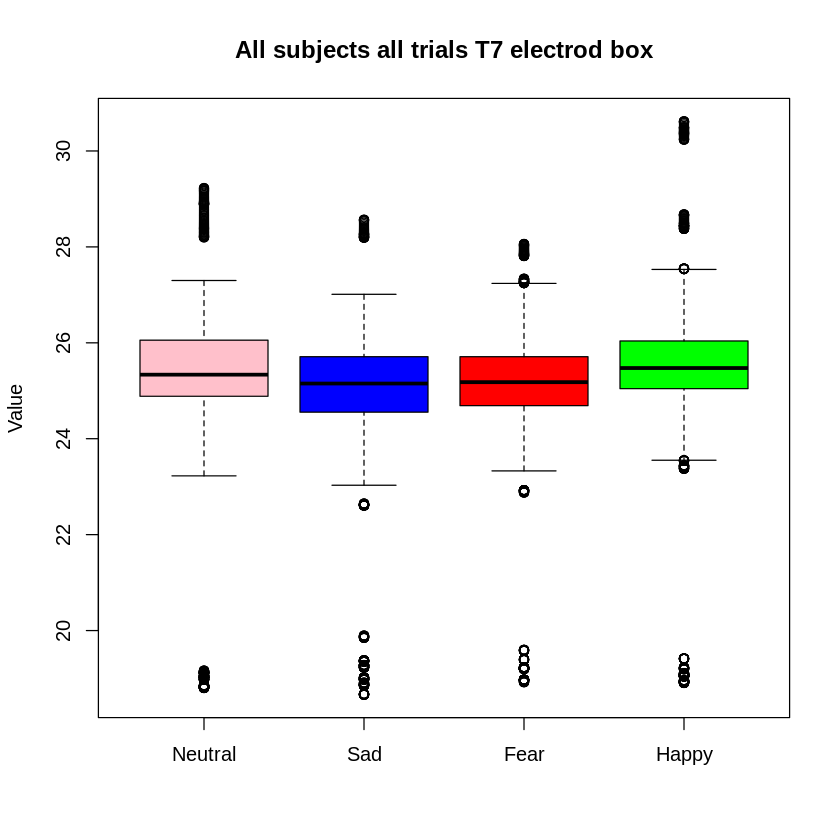

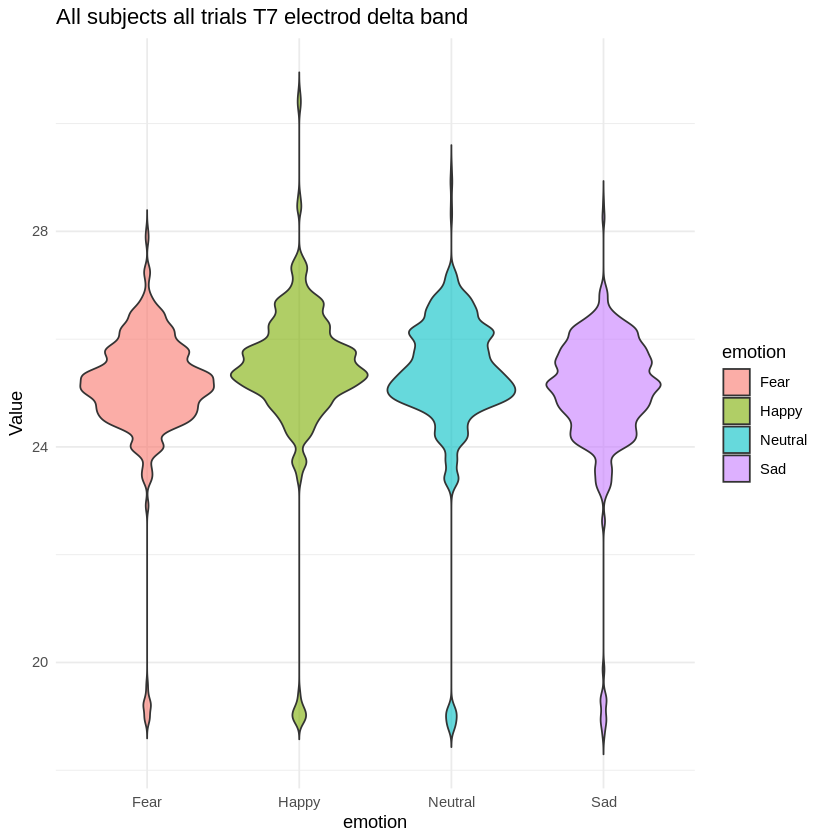

In [14]:
# Now, let us see egg data.

delta_order <- 1
theta_order <- 2
alpha_order <- 3
beta_order <- 4
gamma_order <- 5

# Emotion index
neutral_index <- 0
sad_index <- 1
fear_index <- 2
happy_index <- 3

T7 = cbind(egg_data$T7_delta, egg_data$T7_theta, egg_data$T7_alpha, egg_data$T7_beta, egg_data$T7_gamma)
# Mat plot is easier for the five band data.
matplot(cbind(egg_data$T7_delta, egg_data$T7_theta, egg_data$T7_alpha, egg_data$T7_beta, egg_data$T7_gamma), pch = 19, col = 1:5,
        main = "All subjects all trials T7 electrod",
        xlab = "Index", ylab = "Value")
legend("topright", legend = c("Delta", "Theta", "Alpha", "Beta","Gamma"),
       col = 1:5, pch = 19)

# session1_label = [1,2,3,0 ...], let us see differenct emotions in T7 delta band.
neutral  <- egg_data[egg_data$emotion == neutral_index, ]
sad <- egg_data[egg_data$emotion == sad_index, ]
fear <- egg_data[egg_data$emotion == fear_index, ]
happy <- egg_data[egg_data$emotion == happy_index, ]

# # Well, the emotions are distinguishable.
boxplot(neutral$T7_delta, sad$T7_delta, fear$T7_delta, happy$T7_delta,
        names = c("Neutral", "Sad", "Fear", "Happy"),
        main = "All subjects all trials T7 electrod box",
        ylab = "Value",
        col = c("pink", "blue", "red", "green"))

library(ggplot2)

# Combine the four emotions into one data frame
df <- data.frame(
  value = c(neutral$T7_delta, sad$T7_delta, fear$T7_delta, happy$T7_delta),
  emotion = factor(rep(c("Neutral", "Sad", "Fear", "Happy"),
                       times = c(length(neutral$T7_delta),
                                 length(sad$T7_delta),
                                 length(fear$T7_delta),
                                 length(happy$T7_delta))))
)

# Create violin plot
ggplot(df, aes(x = emotion, y = value, fill = emotion)) +
  geom_violin(trim = FALSE, alpha = 0.6) +
  # geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  labs(title = "All subjects all trials T7 electrod delta band",
       y = "Value") +
  theme_minimal()



